<a href="https://colab.research.google.com/github/Aniket10-IN/Deep-Learning/blob/main/Classification_b_w_Dog_and_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # to ignore warnings
%matplotlib inline

In [3]:
import random

In [4]:
train_path =  'drive/MyDrive/Dog cat/dogs-vs-cats/train'
valid_path = 'drive/MyDrive/Dog cat/dogs-vs-cats/valid'
test_path = 'drive/MyDrive/Dog cat/dogs-vs-cats/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = train_path,target_size =(224,224), classes = ['cat','dog'], batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory= valid_path, target_size=(224,224), classes =['cat','dog'], batch_size= 10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = test_path, target_size = (224,224), classes =['cat', 'dog'], batch_size = 10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
def plot_images(img_array):
  fig, axes = plt.subplots(1,10, figsize =(20,20))
  axes = axes.flatten()
  for img, axes in zip(img_array, axes):
    axes.imshow(img)
    axes.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

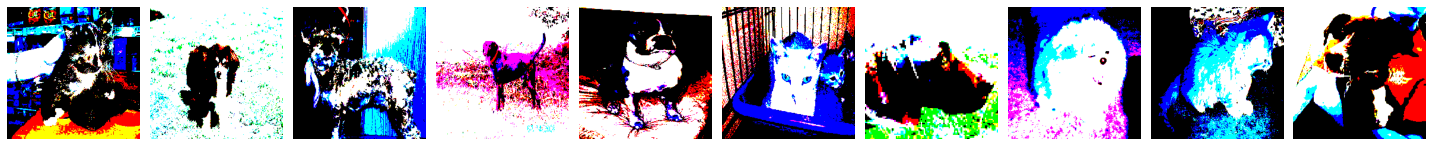

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [8]:
plot_images(imgs)
print(labels)

This is what the first processed random batch from the training set looks like. Notice that the color appears to be distorted. This has to do with the VGG16 processing we applied to the data sets.

Note that dogs are represented with the one-hot encoding of [0,1], and cats are represented by [1,0].

In [9]:
# Building a CNN model:
model = Sequential([
                    Conv2D(32, (3,3), activation ='relu', padding = 'same', input_shape =(224,224,3)), #padding= 'same' gives zero-padding
                    MaxPool2D((2,2), strides = 2), #strides =2, mean cutting the images into half
                    Conv2D(32, (3,3), activation='relu', padding='same'),
                    MaxPool2D((2,2), strides=2),
                    Flatten(),
                    Dense(2, activation='softmax')  #output
                    
]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 200706    
Total params: 210,850
Trainable params: 210,850
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer ='Adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 295s - loss: 51.3324 - accuracy: 0.5220 - val_loss: 0.8560 - val_accuracy: 0.5500
Epoch 2/10
100/100 - 5s - loss: 0.6112 - accuracy: 0.6650 - val_loss: 0.8165 - val_accuracy: 0.5700
Epoch 3/10
100/100 - 5s - loss: 0.4428 - accuracy: 0.8070 - val_loss: 0.9972 - val_accuracy: 0.5100
Epoch 4/10
100/100 - 5s - loss: 0.2255 - accuracy: 0.9260 - val_loss: 1.1034 - val_accuracy: 0.5100
Epoch 5/10
100/100 - 5s - loss: 0.1159 - accuracy: 0.9760 - val_loss: 1.2040 - val_accuracy: 0.5350
Epoch 6/10
100/100 - 5s - loss: 0.0690 - accuracy: 0.9880 - val_loss: 1.4736 - val_accuracy: 0.5100
Epoch 7/10
100/100 - 5s - loss: 0.0264 - accuracy: 0.9960 - val_loss: 1.7222 - val_accuracy: 0.5400
Epoch 8/10
100/100 - 5s - loss: 0.0168 - accuracy: 0.9980 - val_loss: 2.0262 - val_accuracy: 0.5400
Epoch 9/10
100/100 - 5s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.1351 - val_accuracy: 0.5350
Epoch 10/10
100/100 - 5s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.2544 - val_accuracy: 0.5

notice that we haven't mentioned y i.e target data above , because the data is stored as generator as we have here the generator itself identifies the corresponding labels, we donot need to specify them individually

We need to specify steps_per_epoch to indicate how many batches of samples from our training set should be passed to the model before declaring one epoch complete. Since we have 1000 samples in our training set, and our batch size is 10, then we set steps_per_epoch to be 100, since 100 batches of 10 samples each will encompass our entire training set.

We're able to use len(train_batches) as a more general way to specify this value, as the length of train_batches is equal to 100 since it is made up of 100 batches of 10 samples. Similarly, we specify validation_steps in the same fashion but with using valid_batches.

In [13]:
test_images, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

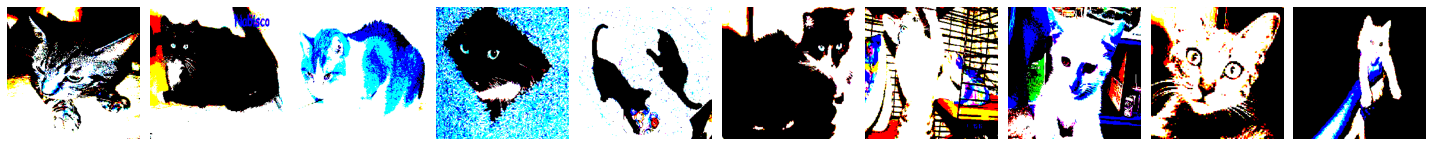

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
plot_images(test_images)
print(test_labels)

Note, because we chose to not shuffle our test set when we originally created it, the first half of the test data is all cats, and the second half is all dogs. Also, recall that the color data appears skewed due to the VGG16 preprocessing we specified when we created the data sets

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
predictions = model.predict(test_batches, verbose = 0)

In [17]:
predictions

array([[8.08858514e-01, 1.91141427e-01],
       [9.99655247e-01, 3.44713131e-04],
       [7.63551116e-01, 2.36448884e-01],
       [4.92167473e-03, 9.95078325e-01],
       [9.95248497e-01, 4.75157285e-03],
       [9.31641281e-01, 6.83587790e-02],
       [9.80122089e-01, 1.98778734e-02],
       [1.12965656e-02, 9.88703430e-01],
       [7.03497827e-01, 2.96502143e-01],
       [3.51358861e-01, 6.48641169e-01],
       [7.74133503e-02, 9.22586620e-01],
       [5.38369775e-01, 4.61630225e-01],
       [9.98252571e-01, 1.74745976e-03],
       [9.93247032e-01, 6.75295200e-03],
       [6.21654764e-02, 9.37834501e-01],
       [8.18079352e-01, 1.81920633e-01],
       [6.82875693e-01, 3.17124307e-01],
       [5.40194996e-02, 9.45980489e-01],
       [9.70179200e-01, 2.98208110e-02],
       [9.96771038e-01, 3.22898990e-03],
       [5.22403061e-01, 4.77596968e-01],
       [9.99849081e-01, 1.50883585e-04],
       [9.93561029e-01, 6.43895660e-03],
       [9.91307676e-01, 8.69239867e-03],
       [6.052388

In [ ]:
import numpy as np

In [ ]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis =-1))

In [ ]:
cm

array([[36, 14],
       [12, 38]])

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
import seaborn as sns

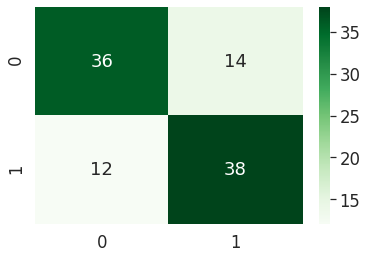

In [ ]:
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, cmap = 'Greens')

##Build finetuned VGG16 model:

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:# except the last one
    model.add(layer)

We first create a new model of type Sequential. We then iterate over each of the layers in vgg16_model, except for the last layer, and add each layer to the new Sequential model.

In [ ]:
model.summary() # notice that vvg16 model and this one both are exactly same except for the last one missing here.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
for layer in model.layers:
  layer.trainable = False

The reason we don't want to retrain these layers is because, as mentioned earlier, cats and dogs were already included in the original ImageNet library. So, VGG16 already does a nice job at classifying these categories. We only want to modify the model such that the output layer understands only how to classify cats and dogs and nothing else. Therefore, we don't want any re-training to occur on the earlier layers.

In [ ]:
model.add(Dense(units =2, activation = 'softmax')) # we only need to retrain this output layer to classify 2 o/p classes.
#and the number of trainable parameters has drastically decreased since we froze all the parameters in the earlier layers.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Train and fine-tuned VGG16 model

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])




In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 290s - loss: 0.1439 - accuracy: 0.9540 - val_loss: 0.1057 - val_accuracy: 0.9650
Epoch 2/5
100/100 - 8s - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.1760 - val_accuracy: 0.9550
Epoch 3/5
100/100 - 8s - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.1327 - val_accuracy: 0.9650
Epoch 4/5
100/100 - 8s - loss: 0.0047 - accuracy: 0.9980 - val_loss: 0.1429 - val_accuracy: 0.9750
Epoch 5/5
100/100 - 8s - loss: 9.6362e-04 - accuracy: 1.0000 - val_loss: 0.1642 - val_accuracy: 0.9700


Looking at the results from training, we can see just after 5 epochs, we have some pretty outstanding results, especially when you compare it to the results we got from our original model.

### Making predictions on VGG16 model

In [ ]:
predictions = model.predict(x = test_batches, verbose = 0) #verbose = 0 , as we do not want to print any o/p.

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
cm = confusion_matrix(y_true= test_batches.classes , y_pred = np.argmax(predictions, axis = -1))

[Text(22.5, 0.5, 'True_Label'),
 Text(0.5, 4.5, 'Predicted Label'),
 Text(0.5, 1.0, 'C_M')]

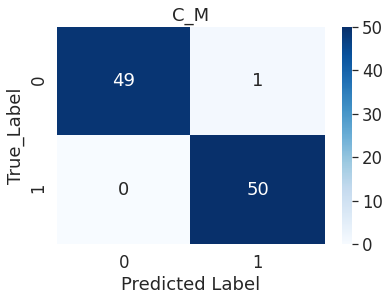

In [ ]:
sns.set(font_scale = 1.5)
ax= plt.axes()
sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set(title = "C_M", xlabel = "Predicted Label", ylabel = "True_Label")